In [1]:
## Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import copy
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings

## Suppress warnings on console
warnings.filterwarnings("default", category=DeprecationWarning)

In [2]:
# Reading input file

input_file = pd.read_csv('./Final_Files/sample_refined_updated.csv')
input_file.head()

,acousticness,analysis_url,danceability,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,...,track_href,type,uri,valence,artist_name,track_name,popularity,bbhot,artist_popularity,artist_followers
0,0.0405,https://api.spotify.com/v1/audio-analysis/2EgB...,0.884,191938,0.698,2EgB4n6XyBsuNUbuarr4eG,0.000000,0,0.1950,-9.101,...,https://api.spotify.com/v1/tracks/2EgB4n6XyBsu...,audio_features,spotify:track:2EgB4n6XyBsuNUbuarr4eG,0.575,Rich The Kid,New Freezer (feat. Kendrick Lamar),76,0,86,1585212
1,0.0375,https://api.spotify.com/v1/audio-analysis/0QVI...,0.852,174653,0.691,0QVISdPWRllAmoDBG3DEHU,0.000000,6,0.0517,-5.175,...,https://api.spotify.com/v1/tracks/0QVISdPWRllA...,audio_features,spotify:track:0QVISdPWRllAmoDBG3DEHU,0.658,Plies,Rock,59,1,68,870286
2,0.0217,https://api.spotify.com/v1/audio-analysis/3h3p...,0.540,204991,0.381,3h3pOvw6hjOvZxRUseB7h9,0.000687,7,0.3050,-14.323,...,https://api.spotify.com/v1/tracks/3h3pOvw6hjOv...,audio_features,spotify:track:3h3pOvw6hjOvZxRUseB7h9,0.343,girl in red,i wanna be your girlfriend,65,0,65,197902
3,0.0141,https://api.spotify.com/v1/audio-analysis/116H...,0.817,210368,0.539,116H0KvKr2Zl4RPuVBruDO,0.000496,6,0.0990,-6.349,...,https://api.spotify.com/v1/tracks/116H0KvKr2Zl...,audio_features,spotify:track:116H0KvKr2Zl4RPuVBruDO,0.158,Bad Bunny,MIA (feat. Drake),94,0,93,12415147
4,0.6820,https://api.spotify.com/v1/audio-analysis/6MXJ...,0.452,255205,0.298,6MXJdqTuSDXkG21JHWiGko,0.000000,2,0.1280,-11.292,...,https://api.spotify.com/v1/tracks/6MXJdqTuSDXk...,audio_features,spotify:track:6MXJdqTuSDXkG21JHWiGko,0.158,Aquilo,Sorry,67,1,64,176979


In [3]:
# Shuffle data frame

input_file = input_file.sample(frac=1)
input_file.head()

,acousticness,analysis_url,danceability,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,...,track_href,type,uri,valence,artist_name,track_name,popularity,bbhot,artist_popularity,artist_followers
580,0.2570,https://api.spotify.com/v1/audio-analysis/2qGf...,0.748,192606,0.578,2qGfZAgDe1pV2y5xJAhi6R,0.000000,9,0.130,-5.720,...,https://api.spotify.com/v1/tracks/2qGfZAgDe1pV...,audio_features,spotify:track:2qGfZAgDe1pV2y5xJAhi6R,0.166,YoungBoy Never Broke Again,Slime Belief,80,0,84,2457094
1840,0.3040,https://api.spotify.com/v1/audio-analysis/0SaY...,0.917,218360,0.476,0SaYeGhSXN0dDWstyNTQ56,0.000000,3,0.103,-6.621,...,https://api.spotify.com/v1/tracks/0SaYeGhSXN0d...,audio_features,spotify:track:0SaYeGhSXN0dDWstyNTQ56,0.870,Wolfine,Bella - Remix,73,0,68,858625
3517,0.0026,https://api.spotify.com/v1/audio-analysis/36ph...,0.617,218773,0.759,36phXHOKx8rO7CMp2vNX4x,0.000000,0,0.419,-6.785,...,https://api.spotify.com/v1/tracks/36phXHOKx8rO...,audio_features,spotify:track:36phXHOKx8rO7CMp2vNX4x,0.324,Hailee Steinfeld,Love Myself,77,1,82,4115557
3293,0.1730,https://api.spotify.com/v1/audio-analysis/11kD...,0.712,196138,0.481,11kDth1aKUEUMq9r1pqyds,0.000000,4,0.241,-5.415,...,https://api.spotify.com/v1/tracks/11kDth1aKUEU...,audio_features,spotify:track:11kDth1aKUEUMq9r1pqyds,0.062,Travis Scott,5% TINT,74,0,94,5506075
981,0.3580,https://api.spotify.com/v1/audio-analysis/0utl...,0.894,216520,0.284,0utlOiJy2weVl9WTkcEWHy,0.000487,11,0.110,-13.002,...,https://api.spotify.com/v1/tracks/0utlOiJy2weV...,audio_features,spotify:track:0utlOiJy2weVl9WTkcEWHy,0.413,J. Cole,Neighbors,76,1,90,8206200


In [4]:
input_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 580 to 1917
Data columns (total 24 columns):
acousticness         5000 non-null float64
analysis_url         5000 non-null object
danceability         5000 non-null float64
duration_ms          5000 non-null int64
energy               5000 non-null float64
track_id             5000 non-null object
instrumentalness     5000 non-null float64
key                  5000 non-null int64
liveness             5000 non-null float64
loudness             5000 non-null float64
mode                 5000 non-null int64
speechiness          5000 non-null float64
tempo                5000 non-null float64
time_signature       5000 non-null int64
track_href           5000 non-null object
type                 5000 non-null object
uri                  5000 non-null object
valence              5000 non-null float64
artist_name          5000 non-null object
track_name           5000 non-null object
popularity           5000 non-null int64
bbhot

In [5]:
## Dropping fields (strings/objects)

'''
drop_list = ['analysis_url','track_id', 'track_href', 'type', 'uri', 
             'artist_name', 'track_name']
'''
drop_list = ['analysis_url','track_id', 'track_href', 'type', 'uri', 
             'artist_name', 'track_name', 'time_signature', 'popularity']


train = input_file.drop(drop_list, axis = 1)


train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 580 to 1917
Data columns (total 15 columns):
acousticness         5000 non-null float64
danceability         5000 non-null float64
duration_ms          5000 non-null int64
energy               5000 non-null float64
instrumentalness     5000 non-null float64
key                  5000 non-null int64
liveness             5000 non-null float64
loudness             5000 non-null float64
mode                 5000 non-null int64
speechiness          5000 non-null float64
tempo                5000 non-null float64
valence              5000 non-null float64
bbhot                5000 non-null int64
artist_popularity    5000 non-null int64
artist_followers     5000 non-null int64
dtypes: float64(9), int64(6)
memory usage: 625.0 KB


In [6]:
## Making a copy of dataframe target variable and assigning it to Y
Y = copy.deepcopy(train.bbhot)
#Y.shape

## Dropping the target attribute and making new dataframe

train_1 = train.drop("bbhot", axis=1)
train_1.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist_popularity,artist_followers
580,0.2570,0.748,192606,0.578,0.000000,9,0.130,-5.720,1,0.1940,140.016,0.166,84,2457094
1840,0.3040,0.917,218360,0.476,0.000000,3,0.103,-6.621,1,0.0655,93.987,0.870,68,858625
3517,0.0026,0.617,218773,0.759,0.000000,0,0.419,-6.785,0,0.0677,122.925,0.324,82,4115557
3293,0.1730,0.712,196138,0.481,0.000000,4,0.241,-5.415,0,0.0487,140.000,0.062,94,5506075
981,0.3580,0.894,216520,0.284,0.000487,11,0.110,-13.002,0,0.3300,138.944,0.413,90,8206200


In [7]:
## Creating standard scaler object

#scaler = StandardScaler()

scaler = MinMaxScaler()

## Fit scaler to features

scaler.fit(train_1)

# Transform features to scaled version

scaled_features = scaler.transform(train_1)

#Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

#df_feat = pd.DataFrame(scaled_features,columns=train_1.columns[:-1])

df_feat = pd.DataFrame(scaled_features,columns=train_1.columns)

df_feat.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist_popularity,artist_followers
0,0.258030,0.769547,0.119154,0.578778,0.000000,0.818182,0.115072,0.849912,1.0,0.200828,0.636150,0.167677,0.84,0.056243
1,0.305219,0.943416,0.138654,0.476482,0.000000,0.272727,0.086929,0.828532,1.0,0.067805,0.427021,0.878788,0.68,0.019654
2,0.002607,0.634774,0.138967,0.760305,0.000000,0.000000,0.416302,0.824641,0.0,0.070083,0.558499,0.327273,0.82,0.094206
3,0.173692,0.732510,0.121828,0.481496,0.000000,0.363636,0.230769,0.857150,0.0,0.050414,0.636077,0.062626,0.94,0.126035
4,0.359436,0.919753,0.137261,0.283923,0.000487,1.000000,0.094226,0.677115,0.0,0.341615,0.631280,0.417172,0.90,0.187842


In [8]:
df_feat.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist_popularity,artist_followers
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,0.267289,0.669352,0.127693,0.594351,0.065873,0.479618,0.158142,0.809321,0.58780,0.129344,0.546784,0.440478,0.73737,0.073398
std,0.285579,0.165742,0.039007,0.204041,0.216466,0.328965,0.131896,0.100788,0.49228,0.122346,0.136851,0.221310,0.14920,0.136711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.038928,0.567901,0.107442,0.474476,0.000000,0.181818,0.082317,0.784817,0.00000,0.042857,0.436076,0.270707,0.65000,0.003180
50%,0.153612,0.686214,0.126045,0.609869,0.000000,0.454545,0.104649,0.832756,1.00000,0.071843,0.545098,0.426263,0.75000,0.017896
75%,0.416665,0.789095,0.146073,0.742503,0.000182,0.727273,0.186992,0.866748,1.00000,0.181418,0.645105,0.597980,0.85000,0.071832
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


In [9]:
## Function to evaluate any model by applying cross validation

def testingModel(model, X_train, Y_train):
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring = "roc_auc")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    return scores.mean()

In [10]:
## Using train test split to implement LR modelling

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

X = df_feat

y = Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

logmodel = LogisticRegression()

#logmodel = LogisticRegression(solver='lbfgs')

#logmodel = LogisticRegression(solver='newton-cg')

logreg = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

accuracy = logmodel.score(X_test, y_test)
print("Prediction Accuracy Without Cross Validation: %.2f%%" % (accuracy * 100.0))

print("Confusion Matrix: ")
print(confusion_matrix(y_test,predictions))

print("Classification Report: ")
print(classification_report(y_test,predictions))

Prediction Accuracy Without Cross Validation: 59.73%
Confusion Matrix: 
[[452 305]
 [299 444]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       757
           1       0.59      0.60      0.60       743

   micro avg       0.60      0.60      0.60      1500
   macro avg       0.60      0.60      0.60      1500
weighted avg       0.60      0.60      0.60      1500



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
logmodel.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

In [11]:
# With cross validation

#logreg = LogisticRegression(solver='lbgfs')

#logreg = LogisticRegression(solver='newton-cg')

logreg = LogisticRegression(solver='liblinear')

logreg.fit(df_feat, Y)

acc_log = testingModel(logreg, df_feat, Y)

print("Prediction Accuracy With 10-Fold Cross Validation(Mean Value): %.2f%%" % (acc_log * 100.0))

predictions = logreg.predict(df_feat)

print(classification_report(Y,predictions))

Scores: [0.64664  0.65896  0.669456 0.624    0.607056 0.683216 0.661696 0.648064
 0.634048 0.613344]
Mean: 0.6446479999999999
Standard Deviation: 0.023549588191728518
Prediction Accuracy With 10-Fold Cross Validation(Mean Value): 64.46%
              precision    recall  f1-score   support

           0       0.60      0.63      0.61      2500
           1       0.61      0.58      0.59      2500

   micro avg       0.60      0.60      0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.60      0.60      5000



In [12]:
print("Hyperparameters: ",logreg.get_params)

Hyperparameters:  <bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)>


In [17]:
cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
           'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'artist_popularity']

In [20]:
## Selecting and tuning algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def select_model(df,features):
    
    #all_X = df[features]
    all_X = df_feat
    all_y = Y

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        #{
         #   "name": "KNeighborsClassifier",
         #   "estimator": KNeighborsClassifier(),
         #   "hyperparameters":
         #       {
         #           "n_neighbors": range(1,20,2),
         #           "weights": ["distance", "uniform"],
         #           "algorithm": ["ball_tree", "kd_tree", "brute"],
         #           "p": [1,2]
         #       }
       # },
        #{
         #   "name": "RandomForestClassifier",
         #   "estimator": RandomForestClassifier(random_state=1),
          #  "hyperparameters":
           #     {
            #        "n_estimators": [4, 6, 100],
             #       "criterion": ["entropy", "gini"],
              #      "max_depth": [2, 5, 10],
               #     "max_features": ["log2", "sqrt"],
                #    "min_samples_leaf": [1, 5, 8],
                 #   "min_samples_split": [2, 3, 5]

                #}
        #}
    ]
        
    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Hyper Parameter: {}\n".format(model["best_params"]))

    return models

result = select_model(train,cols)       

LogisticRegression
------------------
Best Score: 0.5884
Best Hyper Parameter: {'solver': 'liblinear'}



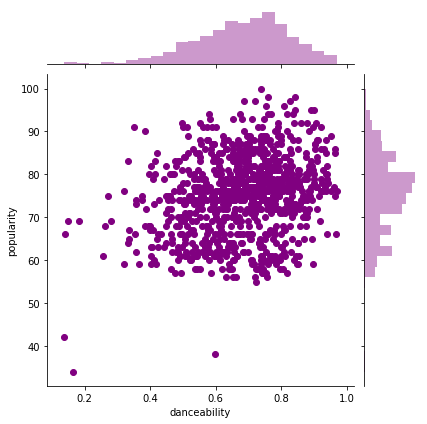

In [66]:
sns.jointplot(x='danceability',y='popularity',data=train_1,color='purple')

In [19]:
from sklearn.model_selection import GridSearchCV

dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

import time

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 10, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(df_feat, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print("Execution time: " + str((time.time() - start_time)) + ' ms')



Best: 0.591000 using {'C': 2.5, 'dual': True, 'max_iter': 100}
Execution time: 4.051131010055542 ms


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 10, n_jobs=-1)

start_time = time.time()
random_result = random.fit(df_feat, y)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')



Best: 0.591000 using {'max_iter': 110, 'dual': True, 'C': 2.5}
Execution time: 0.8689978122711182 ms


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
